# Balanceamento de classes
    * OBS: Como nosso objetivo neste tutorial é tratar o balanceamento de dados não trataremos a tabela com a devida atenção.

## Bibliotecas

In [115]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [116]:
#!pip install imblearn

In [117]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import seaborn as sns

## Coleta de dados

    * Target: coluna de crédito (alvo)

In [118]:
df = pd.read_csv("bank-full.csv", sep=',' )
display(df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Limpeza de dados

In [119]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

## Tratamento de dados

In [120]:
cols = ['education', 'default',  'housing',
       'loan', 'contact', 'month', 'poutcome', 'Target']
# Aplicando LabelEncoder para coluna facebook (0 ou 1)
for col in cols:
    encoder = LabelEncoder().fit(df[col])
    df[col] = encoder.transform(df[col])
    
# Aplicando One-hot encoder para as demais colunas (usando get_dummies)   
col_dummies = ['job', 'marital']


df = pd.get_dummies(df, columns = col_dummies)
display(df)    

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,2,0,2143,1,0,2,5,8,261,...,0,0,0,0,0,0,0,0,1,0
1,44,1,0,29,1,0,2,5,8,151,...,0,0,0,0,1,0,0,0,0,1
2,33,1,0,2,1,1,2,5,8,76,...,0,0,0,0,0,0,0,0,1,0
3,47,3,0,1506,1,0,2,5,8,92,...,0,0,0,0,0,0,0,0,1,0
4,33,3,0,1,0,0,2,5,8,198,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2,0,825,0,0,0,17,9,977,...,0,0,0,0,1,0,0,0,1,0
45207,71,0,0,1729,0,0,0,17,9,456,...,1,0,0,0,0,0,0,1,0,0
45208,72,1,0,5715,0,0,0,17,9,1127,...,1,0,0,0,0,0,0,0,1,0
45209,57,1,0,668,0,0,1,17,9,508,...,0,0,0,0,0,0,0,0,1,0


### Treinando o modelo (sem balancear)

In [121]:
# Verificando a discrepancia dos dados
# Notamos que está completamente desbalanceados
df.default.value_counts()

0    44396
1      815
Name: default, dtype: int64

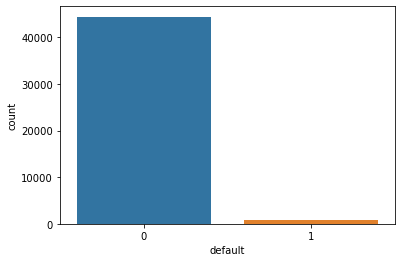

In [122]:
import seaborn as sns
ax = sns.countplot(x='default', data=df)

### Algoritmo classificador

In [123]:
lr = LogisticRegression()


### Separar dados e suas classes

In [124]:
# Separa a variavel alvo da tabela
X = df.drop('default', axis=1)
y = df.default

### Separar dados de treino e teste
    * Percentual padrão: 70% treino 30% teste
    * random_state: Aleatóriedade
    * stratify: Embaralhar os dados

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1 , stratify=y)

### Treinando o algoritmo

In [126]:
# passando pro classificador os dados de treino
lr.fit(X_train, y_train)

C:\Users\devda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Coloca as classificações na var y_pred

In [127]:
y_pred = lr.predict(X_test)

### Checando a acurácia do modelo

In [128]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracity de {acc:,.2%}')

Accuracity de 98.15%


### Relatório de classificação
    * Observe o Recall

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11099
           1       0.22      0.01      0.02       204

    accuracy                           0.98     11303
   macro avg       0.60      0.50      0.50     11303
weighted avg       0.97      0.98      0.97     11303



### Matriz de confusão

In [130]:
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0  1    All
Real                    
0        11092  7  11099
1          202  2    204
All      11294  9  11303


# Balanceamento de classes

## Aplicando NearMiss
    * Método de Undersampling
    * Iguala as qunatidades de amostras entre as classes

In [131]:
from imblearn.under_sampling import NearMiss

### Instanciando NR

In [132]:
# Aqui podemos passar os parametros para o nr
nr = NearMiss()

### Aplicando NR

In [133]:
# descobre as classes majoritárias e iguala as minoritarias
X, y = nr.fit_resample(X, y)

### Checando as novas amostras
    * Reduziu as classes majoritarias a nível de minoritaria ficando com apenas 800 amostras cada

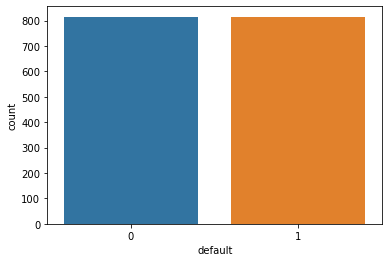

In [134]:
ax = sns.countplot(x=y)

### Repetindo as etapas (treinando modelo)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1 , stratify=y)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracity de {acc:,.2%}')

Accuracity de 75.25%


C:\Users\devda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Recall

In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       204
           1       0.80      0.68      0.73       204

    accuracy                           0.75       408
   macro avg       0.76      0.75      0.75       408
weighted avg       0.76      0.75      0.75       408



### Matriz de confusão

In [137]:
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0    1  All
Real                  
0        169   35  204
1         66  138  204
All      235  173  408


NOTAS: Apesar da acuracia cair, nosso modelo conseguiu prever com melhor eficiência ambas as classes.

## Aplicando SMOTE


In [138]:
from imblearn.over_sampling import SMOTE

### Separar dados e suas classes

In [139]:
# Separa a variavel alvo da tabela
X = df.drop('default', axis=1)
y = df.default

### Visualizando a qunatidade de dados por classe

In [140]:
np.bincount(y)

array([44396,   815], dtype=int64)

### instancia SMOTE

In [141]:
# Atenção ao parametro abaixo
# sampling_strategy = 0.5 : Ajusta os dados minoritários em 50% a mais
smt = SMOTE()

### Aplica SMOTE

In [142]:
X, y = smt.fit_resample(X, y)

### Visualizando as amostras

In [143]:
np.bincount(y)

array([44396, 44396], dtype=int64)

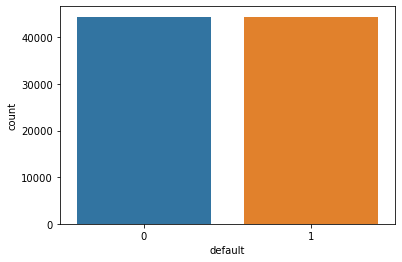

In [144]:
ax = sns.countplot(x=y)

### Repetindo processo de treino

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1 , stratify=y)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracity de {acc:,.2%}')

Accuracity de 87.26%


C:\Users\devda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Recall

In [146]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87     11099
           1       0.87      0.88      0.87     11099

    accuracy                           0.87     22198
   macro avg       0.87      0.87      0.87     22198
weighted avg       0.87      0.87      0.87     22198



### Matriz de confusão

In [147]:
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0      1    All
Real                        
0         9633   1466  11099
1         1362   9737  11099
All      10995  11203  22198


NOTA: Em todos os testes este foi o que trouxe melhor resultado.